# Fashion clothes classification 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import random


In [2]:
# now we are going to define our dataframe 
# one for the training and one for testing

fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [3]:

# now we are going to visualize the data 
# we have 784 colomnus cause we have 28*28=784 pixels images , plus 1 column for label
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# to see the distribution 
fashion_train_df.shape
# we have 60000 row and 785 comlumn 

(60000, 785)

In [6]:
# now we create the training and testing arrays 
training= np.array(fashion_train_df,dtype='float32')
testing= np.array(fashion_test_df,dtype='float32')

In [9]:
training.shape

(60000, 785)

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

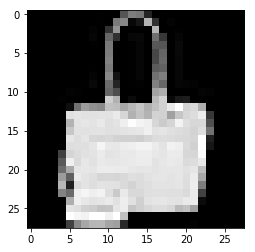

In [7]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [8]:
label = training[i,0]
label

8.0

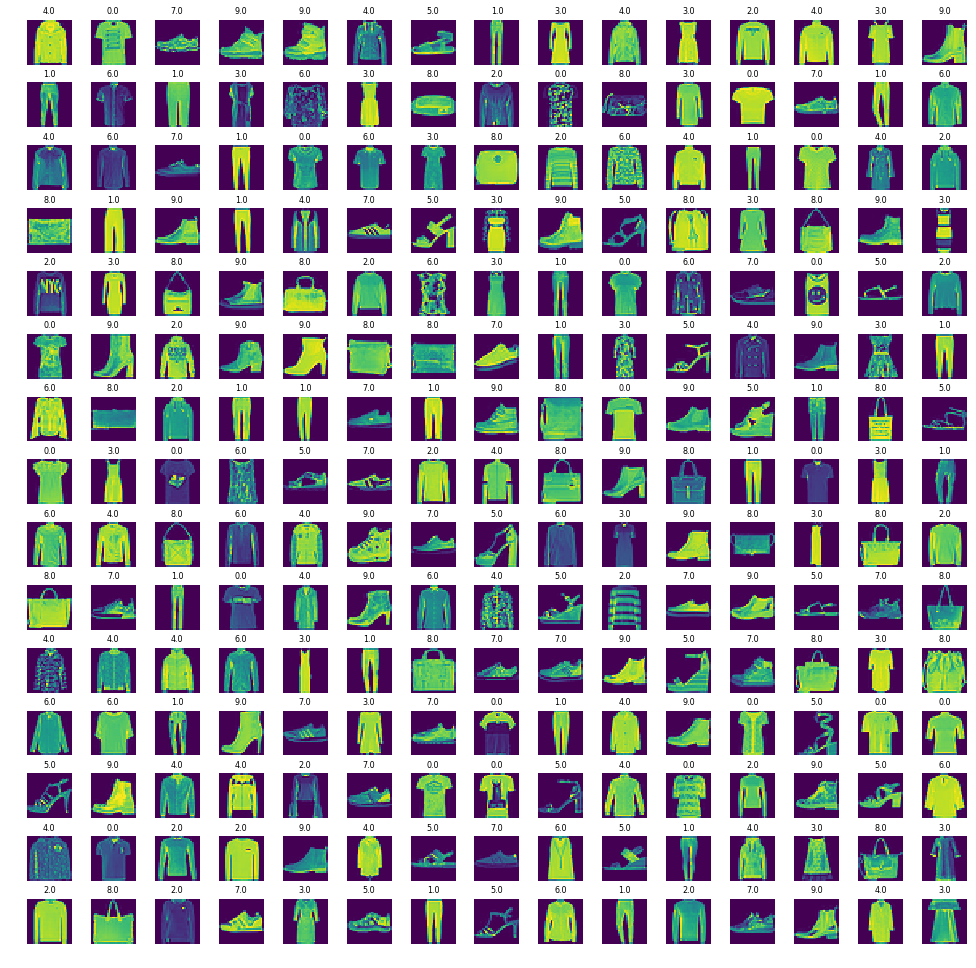

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [12]:
# training the model
# prepare the training and testing dataset 
# rows ,columns 
X_train = training[:,1:]/255  # it means take all the data ":",and we take everything beside the lable 1:
y_train = training[:,0] # we out put the label 

X_test = testing[:,1:]/255
y_test = testing[:,0]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [14]:
# now the training dataset is 48000
X_train.shape

(48000, 784)

In [15]:
y_train.shape

(48000,)

In [16]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [17]:
X_train.shape

(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [22]:
# Import train_test_split from scikit library
# Import Keras
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)
from keras.models import Sequential # because we are going to build the model step by step
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# you will need to download tensorFlow for this one to work 
# use anaconda 

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [23]:
cnn_model = Sequential()  # we use it because we are building the model step by step 

# we use a filter/  convolution  of 64 layers -- the dimension is 3*3 
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
# the pooling we do is 2*2 
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))


# we flaten the result of the pooling 
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu')) # we eliminate the negative values 
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


NameError: name 'Sequential' is not defined

In [25]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

NameError: name 'cnn_model' is not defined

In [26]:
# number of iterations
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

NameError: name 'cnn_model' is not defined

In [ ]:
# model evaluation 
# we are going to compare the accuracy of the test data set and the training data set
# from the result we can observe that the test accurancy is a bit lower that the training 
# and that is normal ,cause the model has never saw the data before 
# but in overall the result is above 90% 
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

In [ ]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


In [ ]:
# now we build a grid where we can see the actual label of each clothe and the predict label of the model
L = 5
W = 5
# figure size is 12*12
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

# now we arrange the grind and the pictures are 28*28 
# we display true label and predicted one 
for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


In [ ]:
# confusion matrix 
# so that we can see the true prediction from the false wrong ones 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [ ]:
from sklearn.metrics import classification_report
# now we print to have a report of the evaluation of the model 
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))